Expected diagram encodes the topology of a random process as a deterministice measure.

Overview:

* Consider a cloud of points $X$ with $n$ points, split $(1-p)n$ poits $X_{\text{true}}$ on a nice shape $M$, and $pn$, called $X_{\text{out}}$, are the outliers.

* Computing the persistence diagram won't reflect the true topology $M$, thus, we sample some points and averaging.

In [17]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt

In [19]:
# No. points
n = 10000
# Percentage of outliers
p = 0.01

# No. points
n_true = int((1-p) * n)
n_outliers = n - n_true

In [20]:
def sample_torus(no_samples, r1, r2):
    theta1 = 2 * np.pi*np.random.rand(no_samples)
    theta2 = 2 * np.pi*np.random.rand(no_samples)
    
    x = (r1 + r2 * np.cos(theta2)) * np.cos(theta1)
    y = (r1 + r2 * np.cos(theta2)) * np.sin(theta1)
    z = r2 * np.sin(theta2)
    
    return np.array([x,y,z]).T

In [22]:
def sample_noise(no_samples, no_dim, scale):
    return scale * np.random.randn(no_samples, no_dim)

In [23]:
X_true = sample_torus(n_true, 4, 1)

In [24]:
X_noise = sample_noise(n_outliers, no_dim = X_true.shape[1], scale = np.std(X_true))

In [25]:
X = np.concatenate([X_true, X_noise])

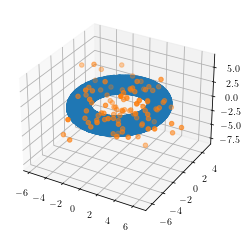

In [26]:
# Plot torus
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X_true[:,0], X_true[:,1], X_true[:,2], 'xb')
ax.scatter(X_noise[:,0], X_noise[:,1], X_noise[:,2], 'or')
plt.show()

In [53]:
complex_tot = gd.AlphaComplex(points = X).create_simplex_tree()
complex_true = gd.AlphaComplex(points = X_true).create_simplex_tree()

persistence_tot = complex_tot.persistence()
persistence_true = complex_true.persistence()

In [54]:
h1_tot = complex_tot.persistence_intervals_in_dimension(1)
h1_true = complex_true.persistence_intervals_in_dimension(1)

In [65]:
no_samples = 100
no_experiments = 100

In [66]:
samples = [np.random.choice(n, no_samples, replace=True) for _ in range(no_experiments)]
X_samples = [X[sample] for sample in samples]

diags = []
for sample in X_samples:
    simplex_tree = gd.AlphaComplex(points = sample).create_simplex_tree()
    persistence = simplex_tree.persistence()
    diags.append(simplex_tree.persistence_intervals_in_dimension(1))

In [85]:
# To historgram
# Discretize diagram, return 2D-histogram
res = 30
lx = -0.1
ly = 1.1
list_hist = []
for diag in diags:
    d2h = np.histogram2d(diag[:, 0], diag[:, 1], bins = res, range = [[lx, ly], [lx, ly]])[0]
    d2h = np.flip(d2h, axis = -1)
    list_hist.append(d2h)
histo = np.mean(list_hist, axis=0)

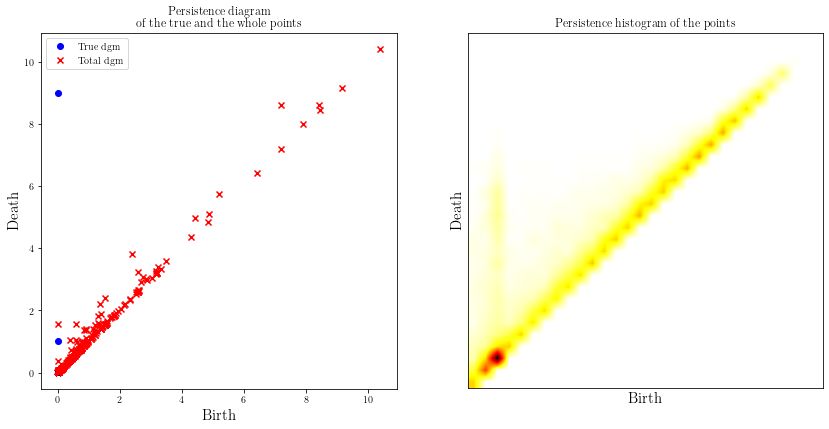

In [86]:
# Plot 
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(h1_true[:, 0], h1_true[:, 1], marker = 'o', color = "b", label="True dgm")
ax1.scatter(h1_tot[:, 0], h1_tot[:, 1], marker = 'x', color = 'r', label='Total dgm')
ax1.set_aspect("equal")
ax1.set_xlabel("Birth", fontsize=15)
ax1.set_ylabel("Death", fontsize=15)
ax1.legend(loc="best")
ax1.set_title("Persistence diagram\nof the true and the whole points")


ax2.imshow(histo, cmap="hot_r", interpolation="bilinear")
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_aspect("equal")
ax2.set_xlabel("Birth", fontsize=15)
ax2.set_ylabel("Death", fontsize=15)
ax2.set_title("Persistence histogram of the points")

plt.show()